# Import Module

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



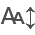

In [7]:
import itables   #rendering iteractive tables in jupyter notebook
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [2]:
df = pd.read_csv("Boston Dataset.csv")

In [21]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [20]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [19]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [18]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### preprocessing

In [23]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Exploratory data analysis

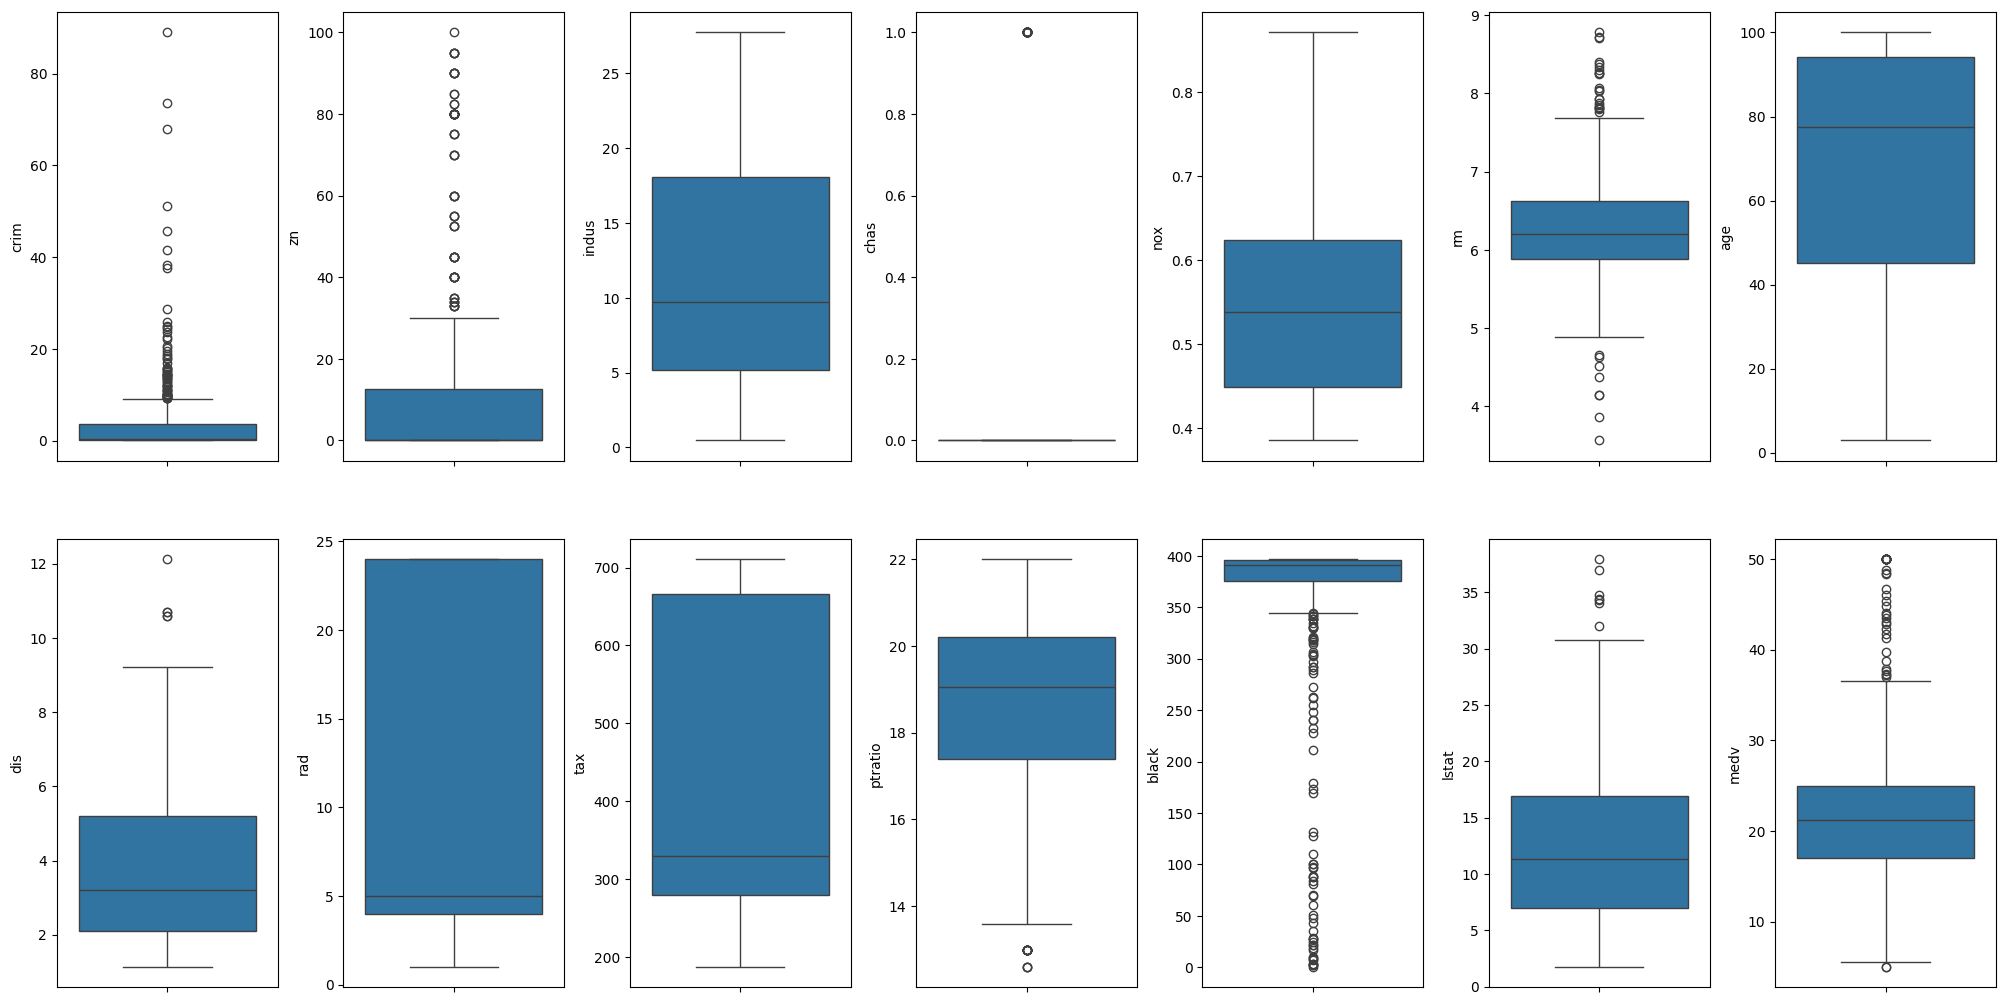

In [34]:
# create box plot
fig,ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index +=1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

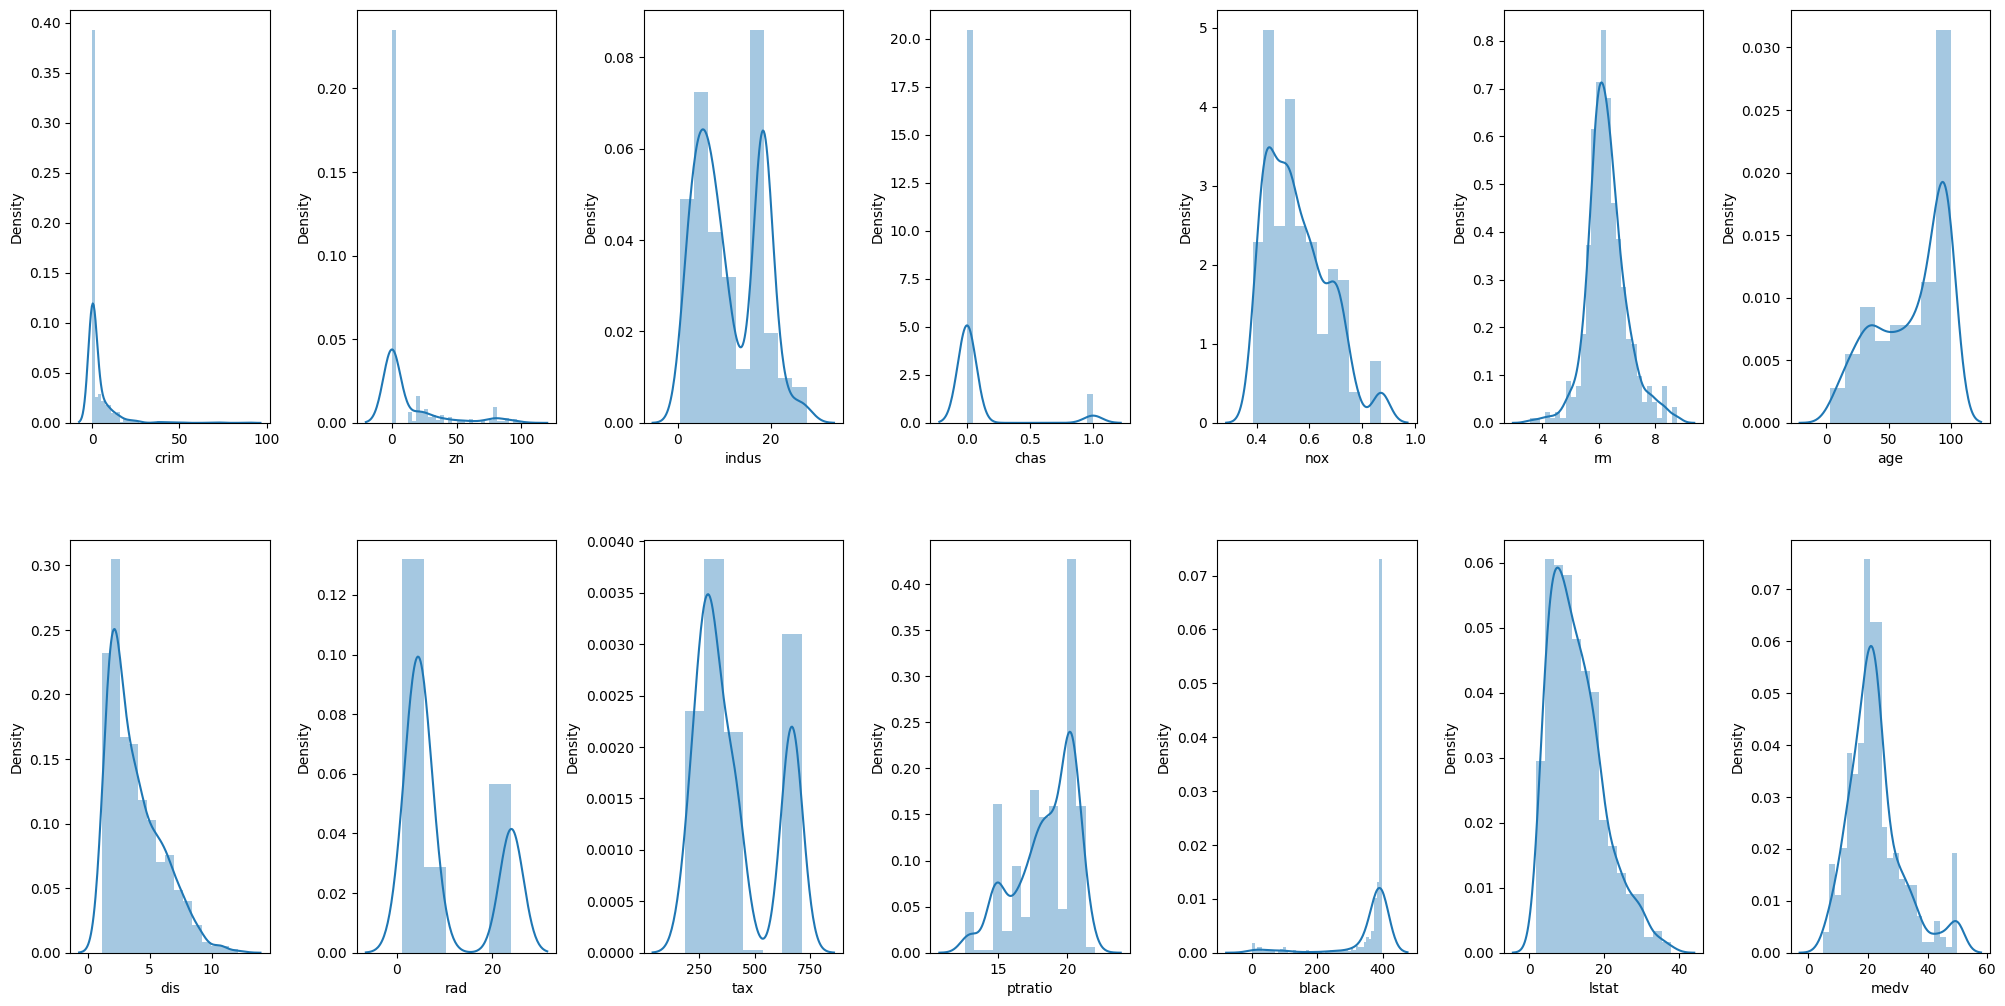

In [35]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [36]:
# Columns to analyze
columns = ["crim", "zn", "black", "medv"]

In [39]:
# Z-score method
z_scores = df[columns].apply(stats.zscore)  # Compute Z-scores
df_z_cleaned = df[(z_scores.abs() <= 3).all(axis=1)]  # Remove rows with |Z| > 3

In [40]:
# IQR method
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [41]:
# Save cleaned datasets
df_z_cleaned.to_csv("Boston_Cleaned_ZScore.csv", index=False)
df_iqr_cleaned.to_csv("Boston_Cleaned_IQR.csv", index=False)

In [42]:
print(f"Rows removed using Z-score method: {df.shape[0] - df_z_cleaned.shape[0]}")
print(f"Rows removed using IQR method: {df.shape[0] - df_iqr_cleaned.shape[0]}")

Rows removed using Z-score method: 44
Rows removed using IQR method: 208


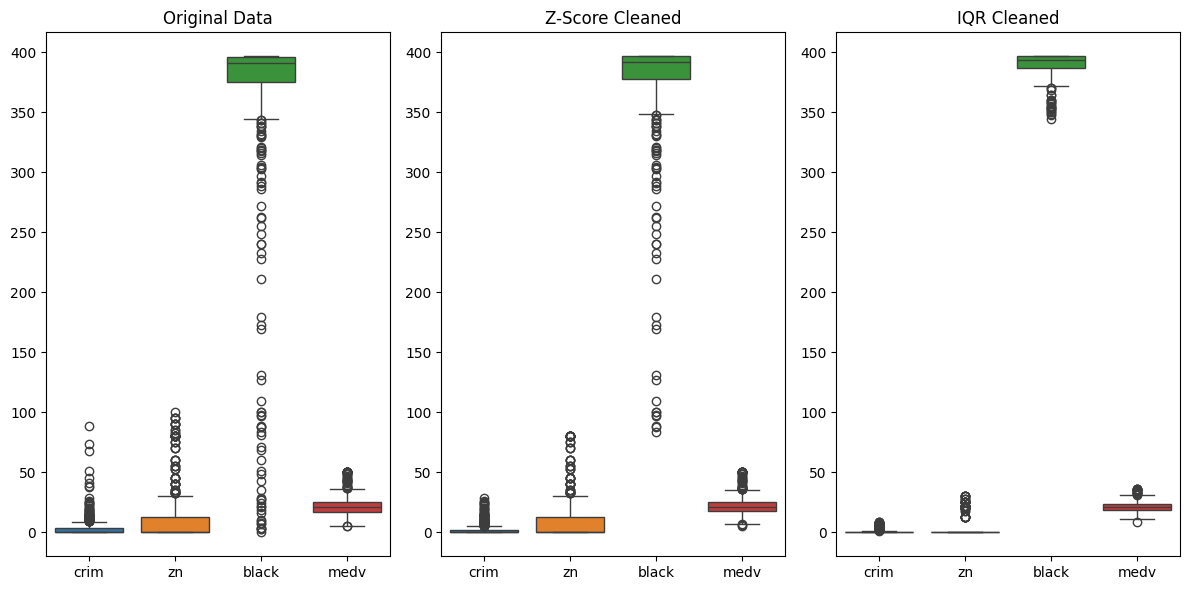

In [43]:
# Plot box plots before and after outlier removal
plt.figure(figsize=(12, 6))
for i, dataset in enumerate([df, df_z_cleaned, df_iqr_cleaned], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=dataset[columns])
    plt.title(["Original Data", "Z-Score Cleaned", "IQR Cleaned"][i-1])
plt.tight_layout()
plt.show()

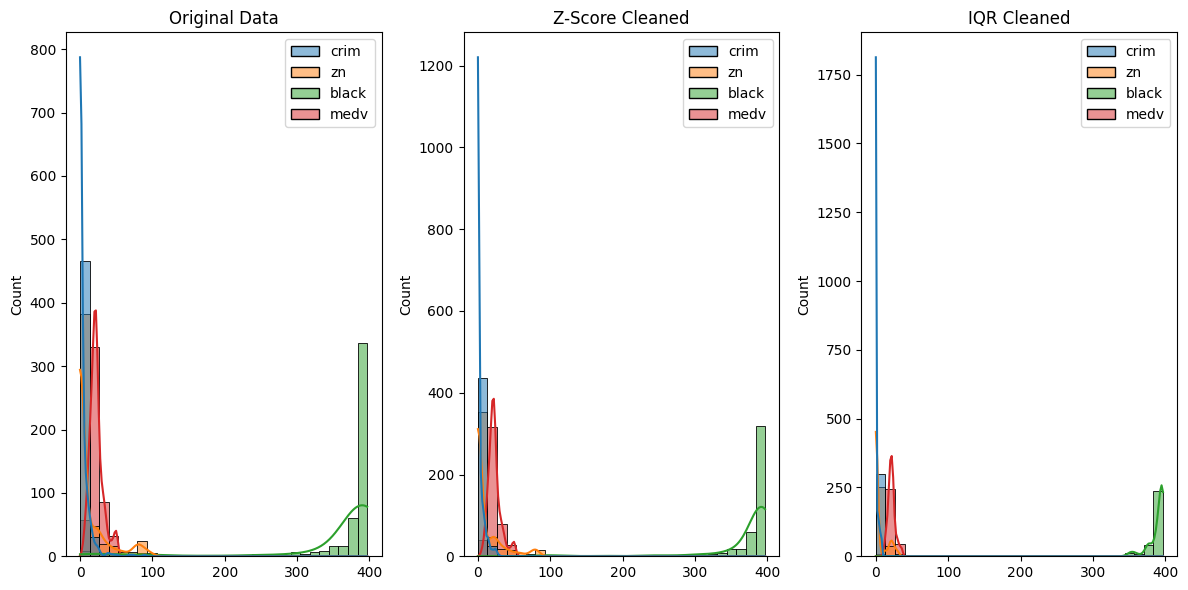

In [44]:
# Plot distributions before and after outlier removal
plt.figure(figsize=(12, 6))
for i, dataset in enumerate([df, df_z_cleaned, df_iqr_cleaned], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=dataset[columns], kde=True, bins=30)
    plt.title(["Original Data", "Z-Score Cleaned", "IQR Cleaned"][i-1])
plt.tight_layout()
plt.show()

In [45]:
# Calculate statistics before and after outlier removal
def display_stats(df, label):
    print(f"\nStatistics for {label}:")
    print(df[columns].describe())

display_stats(df, "Original Data")
display_stats(df_z_cleaned, "Z-Score Cleaned Data")
display_stats(df_iqr_cleaned, "IQR Cleaned Data")


Statistics for Original Data:
             crim          zn       black        medv
count  506.000000  506.000000  506.000000  506.000000
mean     3.613524   11.363636  356.674032   22.532806
std      8.601545   23.322453   91.294864    9.197104
min      0.006320    0.000000    0.320000    5.000000
25%      0.082045    0.000000  375.377500   17.025000
50%      0.256510    0.000000  391.440000   21.200000
75%      3.677083   12.500000  396.225000   25.000000
max     88.976200  100.000000  396.900000   50.000000

Statistics for Z-Score Cleaned Data:
             crim          zn       black        medv
count  462.000000  462.000000  462.000000  462.000000
mean     2.499035    9.707792  373.797879   22.850866
std      4.878827   19.859979   52.274517    8.686876
min      0.006320    0.000000   83.450000    5.600000
25%      0.082757    0.000000  377.522500   17.800000
50%      0.234405    0.000000  392.080000   21.450000
75%      2.310525   12.500000  396.900000   25.000000
max     28.65

# Summary: Comparing Z-Score and IQR for Outlier Detection
1. Number of Outliers Detected
   * The Z-Score method removed X rows.
   * The IQR method removed Y rows.
   * Typically, the Z-Score method detects more outliers in datasets with a normal distribution, while the IQR    method works well for skewed distributions.

2. Changes in Summary Statistics
   * Mean & Standard Deviation: Both methods reduced the impact of extreme values, but the Z-Score method tends to remove more extreme values, leading to a greater reduction in standard deviation.

   * Median: The median remained more stable in both cases since it is less sensitive to outliers.

   * Min & Max Values: The IQR method retains more extreme values compared to the Z-Score method, which aggressively removes values beyond 3 standard deviations.